# CASE STUDY ON UNSUPERVISED LEARNING
**The Whole sale customer data is given
italicized text**
 1. Read the dataset to the python environment.
2. Try out different clustering models in the Whole sale customer dataset.
3. Find the optimum number of clusters in each model and create the model withthe optimum number of clusters.
4. Perform DBSCAN Clustering
5. Also perform PCA for Dimensionality reduction.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('/content/sample_data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [20]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [21]:
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.drop(['Channel','Region'],axis=1,inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Scaling the dstset

In [25]:
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)
df= pd.DataFrame(df_std, columns=df.columns)
df.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293


#Kmeans Clustering

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=43)
df['Clusters'] = kmeans.fit_predict(df)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,0
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,0
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,1
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,0


Apply the Elbow Method to determine the optimal no of clusters


In [28]:
inertia = []

k_values = range(1,11)
for k in k_values:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)
  print(k, 'Cluster', inertia)

1 Cluster [2759.5795454545478]
2 Cluster [2759.5795454545478, 2023.20284388884]
3 Cluster [2759.5795454545478, 2023.20284388884, 1692.7954827278913]
4 Cluster [2759.5795454545478, 2023.20284388884, 1692.7954827278913, 1343.2326575913319]
5 Cluster [2759.5795454545478, 2023.20284388884, 1692.7954827278913, 1343.2326575913319, 1068.6702903395305]
6 Cluster [2759.5795454545478, 2023.20284388884, 1692.7954827278913, 1343.2326575913319, 1068.6702903395305, 955.2059912989117]
7 Cluster [2759.5795454545478, 2023.20284388884, 1692.7954827278913, 1343.2326575913319, 1068.6702903395305, 955.2059912989117, 833.8757774255503]
8 Cluster [2759.5795454545478, 2023.20284388884, 1692.7954827278913, 1343.2326575913319, 1068.6702903395305, 955.2059912989117, 833.8757774255503, 758.4047084735151]
9 Cluster [2759.5795454545478, 2023.20284388884, 1692.7954827278913, 1343.2326575913319, 1068.6702903395305, 955.2059912989117, 833.8757774255503, 758.4047084735151, 724.1408008508607]
10 Cluster [2759.5795454545

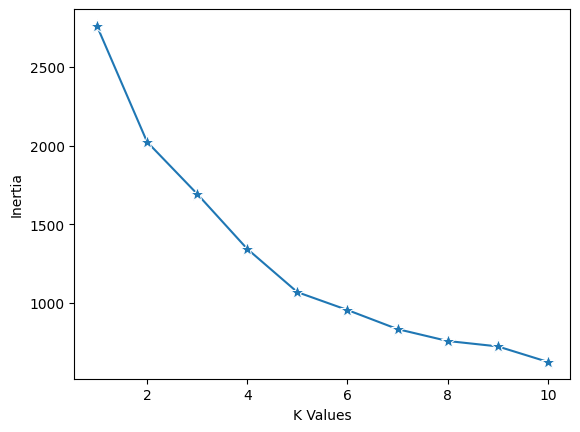

In [31]:
sns.lineplot(x=k_values, y=inertia, linestyle='-', marker='*', markersize=10)
plt.xlabel('K Values')
plt.ylabel('Inertia')
plt.show()

**5 is the optimal no of clusters**

KMeans model withthe optimum number of clusters.

In [32]:
kmeans = KMeans(n_clusters=5, random_state=43)
df['Clusters'] = kmeans.fit_predict(df)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,4
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,4
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,3
...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,3
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,3
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,4
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,0


# DBSCAN Clustering

In [34]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10)
df['Clusters'] = dbscan.fit_predict(df)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,-1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-1
...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,-1
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,4
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,-1
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,0


## Dimensionality reduction - PCA

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2
0,0.251848,-0.143039,-0.637612
1,0.377812,0.548296,0.103991
2,1.006659,-1.623285,-0.670175
3,-0.696479,-0.921403,-0.031474
4,0.370926,-1.976599,-0.335994


In [39]:
print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)
print("\nTotal explained variance ratio:")
print(sum(pca.explained_variance_ratio_))
print("\nReduced data shape:", df_pca.shape)

Explained variance ratio by each component:
[0.34675915 0.24253712 0.19585118]

Total explained variance ratio:
0.7851474569458063

Reduced data shape: (440, 3)
